In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.io import wavfile

In [27]:
l=27.6/100
v = 343 #m/s
n=np.array([1,3,5,7,9,11,13,15,17,19,21,23,25,27,29]) # harmonics
freq = (n*v)/(4*l)
lam = (4*l)/n
freq

array([ 310.6884058 ,  932.06521739, 1553.44202899, 2174.81884058,
       2796.19565217, 3417.57246377, 4038.94927536, 4660.32608696,
       5281.70289855, 5903.07971014, 6524.45652174, 7145.83333333,
       7767.21014493, 8388.58695652, 9009.96376812])

In [32]:
l=11.875/39.37
v = 343 #m/s
n=np.array([1,3,5,7,9,11,13,15,17,19,21,23,25,27,29]) # harmonics
freq = (n*v)/(4*l)
lam = (4*l)/n
freq

array([ 284.29284211,  852.87852632, 1421.46421053, 1990.04989474,
       2558.63557895, 3127.22126316, 3695.80694737, 4264.39263158,
       4832.97831579, 5401.564     , 5970.14968421, 6538.73536842,
       7107.32105263, 7675.90673684, 8244.49242105])

In [19]:
l=10.875/39.37
v = 343 #m/s
n=np.array([1,3,5,7,9,11,13,15,17,19,21,23,25,27,29]) # harmonics
freq = (n*v)/(4*l)
lam = (4*l)/n
freq

array([ 310.43471264,  931.30413793, 1552.17356322, 2173.04298851,
       2793.91241379, 3414.78183908, 4035.65126437, 4656.52068966,
       5277.39011494, 5898.25954023, 6519.12896552, 7139.9983908 ,
       7760.86781609, 8381.73724138, 9002.60666667])

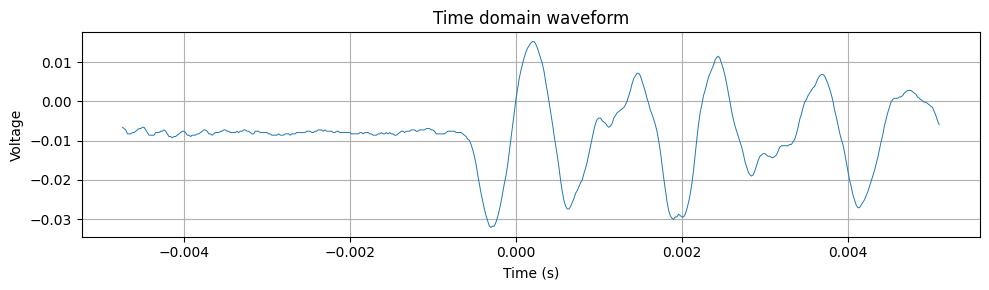

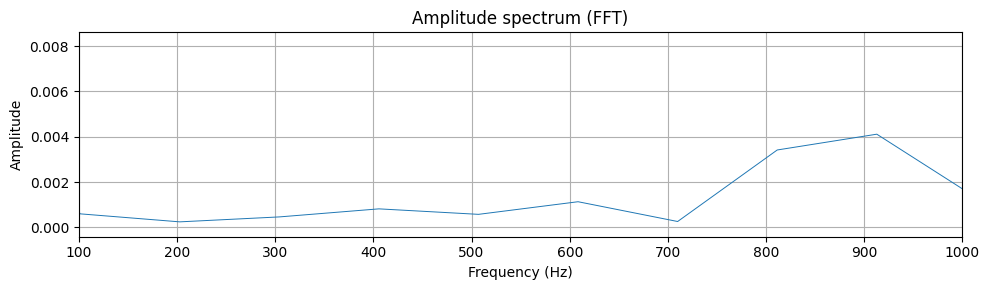

In [20]:
filepath = 'smallwav.csv'
try:
    df = pd.read_csv(filepath, header=19, encoding='utf-8')
except UnicodeDecodeError:
    # fallback to single-byte encodings if file isn't UTF-8
    for enc in ('latin1', 'cp1252'):
        try:
            df = pd.read_csv(filepath, header=19, encoding=enc)
            break
        except Exception:
            df = None
    if df is None:
        raise RuntimeError(f"Failed to read {filepath} with utf-8, latin1, or cp1252 encodings")

# Normalize/ensure column names are time,voltage
cols = [c.strip() for c in df.columns]
df.columns = cols
if set(cols) >= {'x', 'y'}:
    df = df.rename(columns={'x': 'time', 'y': 'voltage'})
elif set(cols) >= {'time', 'voltage'}:
    pass
else:
    # fallback: assume first two columns are time and voltage
    df = df.iloc[:, :2]
    df.columns = ['time', 'voltage']

time = df['time'].to_numpy()
voltage = df['voltage'].to_numpy()

# Plot time-domain signal
plt.figure(figsize=(10, 3))
plt.plot(time, voltage, linewidth=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Voltage')
plt.title('Time domain waveform')
plt.grid(True)
plt.tight_layout()
plt.show()

# Compute FFT
dt = np.mean(np.diff(time))           # sampling interval
fs = 1.0 / dt                         # sampling frequency
N = len(voltage)
yf = np.fft.rfft(voltage)
xf = np.fft.rfftfreq(N, d=dt)
amp = np.abs(yf) / N                  # amplitude spectrum (normalized)

# Plot amplitude spectrum
plt.figure(figsize=(10, 3))
plt.plot(xf, amp, linewidth=0.7)
plt.xlim(0, fs/2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Amplitude spectrum (FFT)')
plt.xlim(100,1000)
plt.grid(True)
plt.tight_layout()
plt.show()

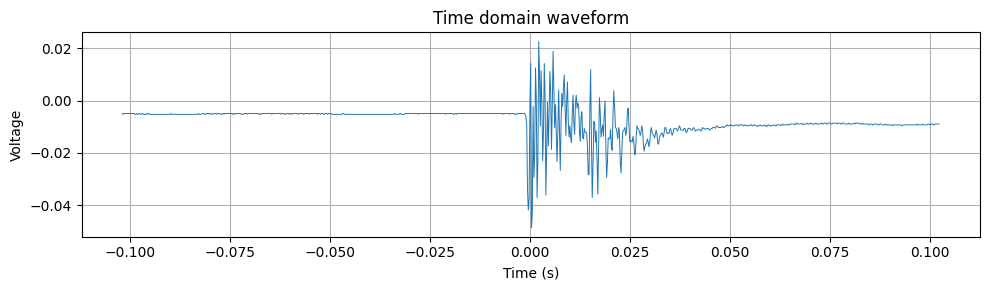

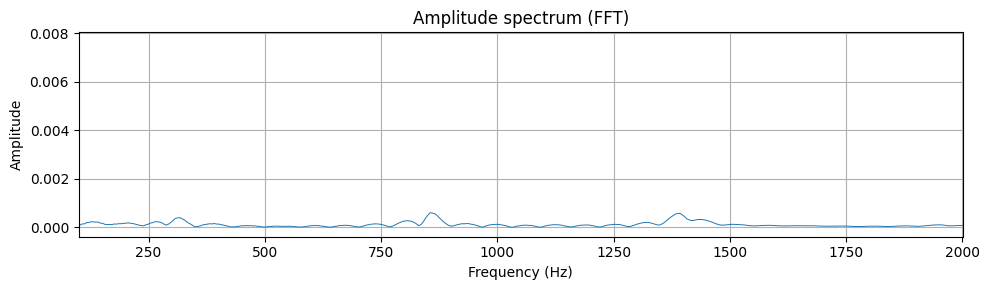

In [21]:
filepath = 'small.csv'
try:
    df = pd.read_csv(filepath, header=19, encoding='utf-8')
except UnicodeDecodeError:
    # fallback to single-byte encodings if file isn't UTF-8
    for enc in ('latin1', 'cp1252'):
        try:
            df = pd.read_csv(filepath, header=19, encoding=enc)
            break
        except Exception:
            df = None
    if df is None:
        raise RuntimeError(f"Failed to read {filepath} with utf-8, latin1, or cp1252 encodings")

# Normalize/ensure column names are time,voltage
cols = [c.strip() for c in df.columns]
df.columns = cols
if set(cols) >= {'x', 'y'}:
    df = df.rename(columns={'x': 'time', 'y': 'voltage'})
elif set(cols) >= {'time', 'voltage'}:
    pass
else:
    # fallback: assume first two columns are time and voltage
    df = df.iloc[:, :2]
    df.columns = ['time', 'voltage']

time = df['time'].to_numpy()
voltage = df['voltage'].to_numpy()

# Plot time-domain signal
plt.figure(figsize=(10, 3))
plt.plot(time, voltage, linewidth=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Voltage')
plt.title('Time domain waveform')
plt.grid(True)
plt.tight_layout()
plt.show()

# Compute FFT
dt = np.mean(np.diff(time))           # sampling interval
fs = 1.0 / dt                         # sampling frequency
N = len(voltage)
yf = np.fft.rfft(voltage)
xf = np.fft.rfftfreq(N, d=dt)
amp = np.abs(yf) / N                  # amplitude spectrum (normalized)

# Plot amplitude spectrum
plt.figure(figsize=(10, 3))
plt.plot(xf, amp, linewidth=0.7)
plt.xlim(0, fs/2)
plt.xlabel('Frequency (Hz)')
plt.xlim(100,2000)

plt.ylabel('Amplitude')
plt.title('Amplitude spectrum (FFT)')
plt.grid(True)
plt.tight_layout()
plt.show()

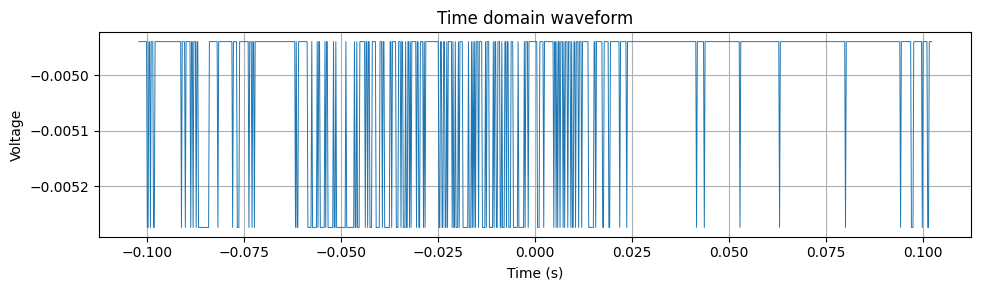

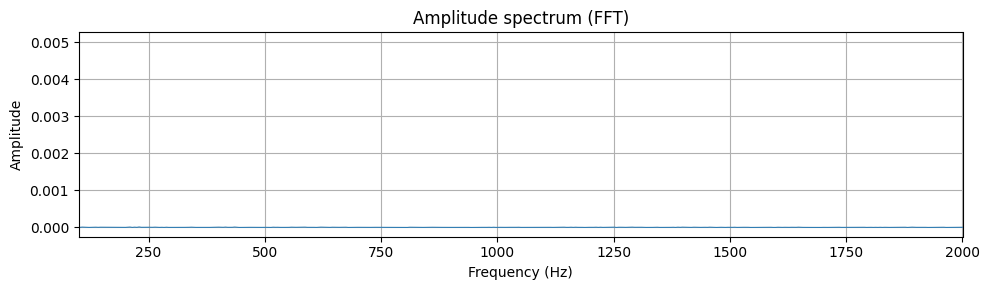

In [ ]:
filepath = 'smallbackground.csv'
try:
    df = pd.read_csv(filepath, header=19, encoding='utf-8')
except UnicodeDecodeError:
    for enc in ('latin1', 'cp1252'):
        try:
            df = pd.read_csv(filepath, header=19, encoding=enc)
            break
        except Exception:
            df = None
    if df is None:
        raise RuntimeError(f"Failed to read {filepath} with utf-8, latin1, or cp1252 encodings")

cols = [c.strip() for c in df.columns]
df.columns = cols
if set(cols) >= {'x', 'y'}:
    df = df.rename(columns={'x': 'time', 'y': 'voltage'})
elif set(cols) >= {'time', 'voltage'}:
    pass
else:
    df = df.iloc[:, :2]
    df.columns = ['time', 'voltage']

time = df['time'].to_numpy()
voltage = df['voltage'].to_numpy()

plt.figure(figsize=(10, 3))
plt.plot(time, voltage, linewidth=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Voltage')
plt.title('Time domain waveform')
plt.grid(True)
plt.tight_layout()
plt.show()

# Compute FFT
dt = np.mean(np.diff(time))           # sampling interval
fs = 1.0 / dt                         # sampling frequency
N = len(voltage)
yf = np.fft.rfft(voltage)
xf = np.fft.rfftfreq(N, d=dt)
amp = np.abs(yf) / N                  # amplitude spectrum (normalized)

# Plot amplitude spectrum
plt.figure(figsize=(10, 3))
plt.plot(xf, amp, linewidth=0.7)
plt.xlim(0, fs/2)
plt.xlabel('Frequency (Hz)')
plt.xlim(100,2000)

plt.ylabel('Background Amplitude')
plt.title('Background Amplitude spectrum (FFT)')
plt.grid(True)
plt.tight_layout()
plt.show()

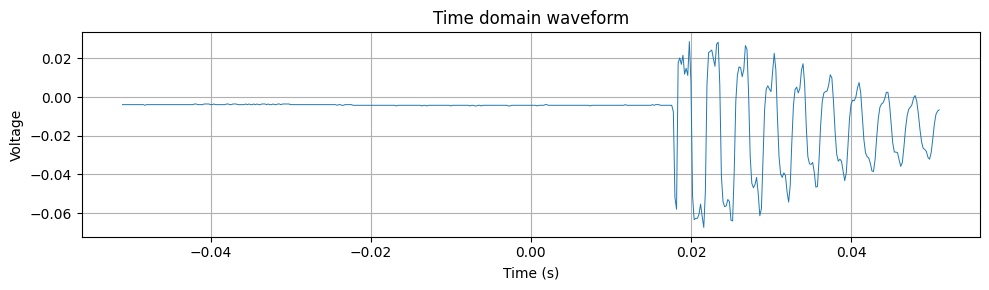

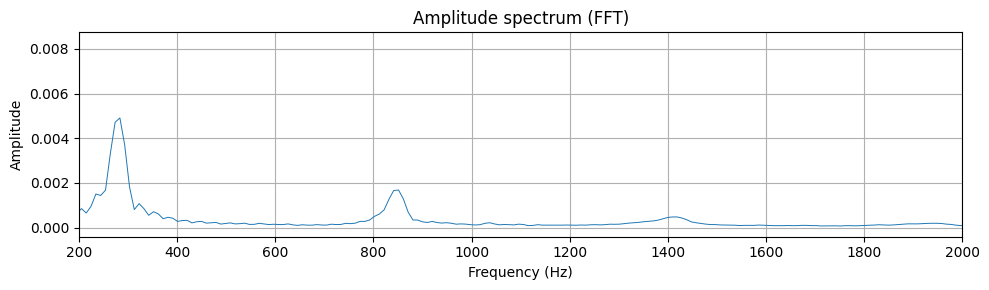

In [29]:
filepath = 'othersmall.csv'
try:
    df = pd.read_csv(filepath, header=19, encoding='utf-8')
except UnicodeDecodeError:
    # fallback to single-byte encodings if file isn't UTF-8
    for enc in ('latin1', 'cp1252'):
        try:
            df = pd.read_csv(filepath, header=19, encoding=enc)
            break
        except Exception:
            df = None
    if df is None:
        raise RuntimeError(f"Failed to read {filepath} with utf-8, latin1, or cp1252 encodings")

# Normalize/ensure column names are time,voltage
cols = [c.strip() for c in df.columns]
df.columns = cols
if set(cols) >= {'x', 'y'}:
    df = df.rename(columns={'x': 'time', 'y': 'voltage'})
elif set(cols) >= {'time', 'voltage'}:
    pass
else:
    # fallback: assume first two columns are time and voltage
    df = df.iloc[:, :2]
    df.columns = ['time', 'voltage']

time = df['time'].to_numpy()
voltage = df['voltage'].to_numpy()

# Plot time-domain signal
plt.figure(figsize=(10, 3))
plt.plot(time, voltage, linewidth=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Voltage')
plt.title('Time domain waveform')
plt.grid(True)
plt.tight_layout()
plt.show()

# Compute FFT
dt = np.mean(np.diff(time))           # sampling interval
fs = 1.0 / dt                         # sampling frequency
N = len(voltage)
yf = np.fft.rfft(voltage)
xf = np.fft.rfftfreq(N, d=dt)
amp = np.abs(yf) / N                  # amplitude spectrum (normalized)

# Plot amplitude spectrum
plt.figure(figsize=(10, 3))
plt.plot(xf, amp, linewidth=0.7)
plt.xlim(0, fs/2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Amplitude spectrum (FFT)')
plt.xlim(200,2000)
plt.grid(True)
plt.tight_layout()
plt.show()

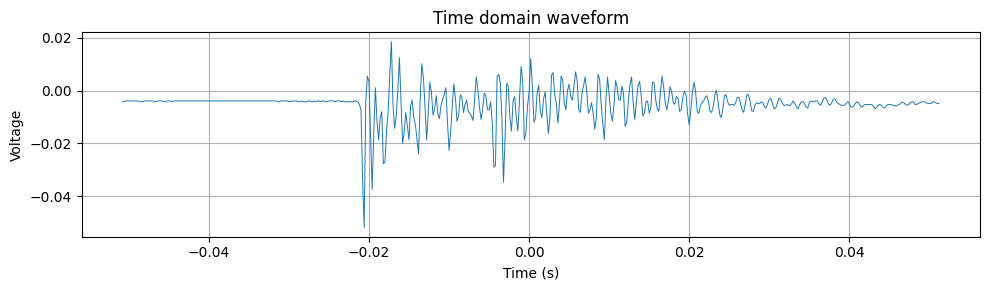

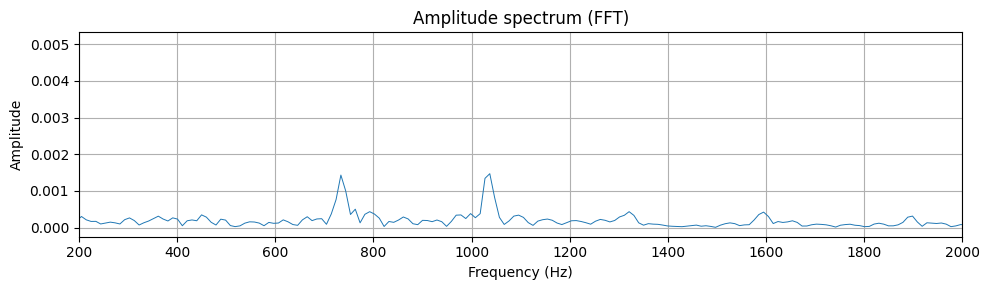

In [30]:
filepath = 'withbaffle.csv'
try:
    df = pd.read_csv(filepath, header=19, encoding='utf-8')
except UnicodeDecodeError:
    # fallback to single-byte encodings if file isn't UTF-8
    for enc in ('latin1', 'cp1252'):
        try:
            df = pd.read_csv(filepath, header=19, encoding=enc)
            break
        except Exception:
            df = None
    if df is None:
        raise RuntimeError(f"Failed to read {filepath} with utf-8, latin1, or cp1252 encodings")

# Normalize/ensure column names are time,voltage
cols = [c.strip() for c in df.columns]
df.columns = cols
if set(cols) >= {'x', 'y'}:
    df = df.rename(columns={'x': 'time', 'y': 'voltage'})
elif set(cols) >= {'time', 'voltage'}:
    pass
else:
    # fallback: assume first two columns are time and voltage
    df = df.iloc[:, :2]
    df.columns = ['time', 'voltage']

time = df['time'].to_numpy()
voltage = df['voltage'].to_numpy()

# Plot time-domain signal
plt.figure(figsize=(10, 3))
plt.plot(time, voltage, linewidth=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Voltage')
plt.title('Time domain waveform')
plt.grid(True)
plt.tight_layout()
plt.show()

# Compute FFT
dt = np.mean(np.diff(time))           # sampling interval
fs = 1.0 / dt                         # sampling frequency
N = len(voltage)
yf = np.fft.rfft(voltage)
xf = np.fft.rfftfreq(N, d=dt)
amp = np.abs(yf) / N                  # amplitude spectrum (normalized)

# Plot amplitude spectrum
plt.figure(figsize=(10, 3))
plt.plot(xf, amp, linewidth=0.7)
plt.xlim(0, fs/2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Amplitude spectrum (FFT)')
plt.xlim(200,2000)
plt.grid(True)
plt.tight_layout()
plt.show()

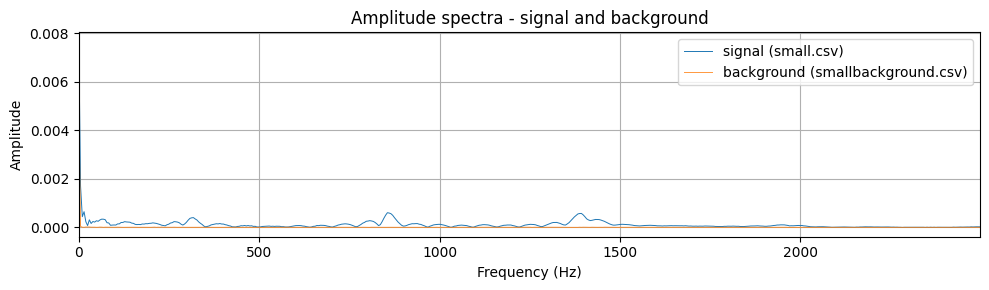

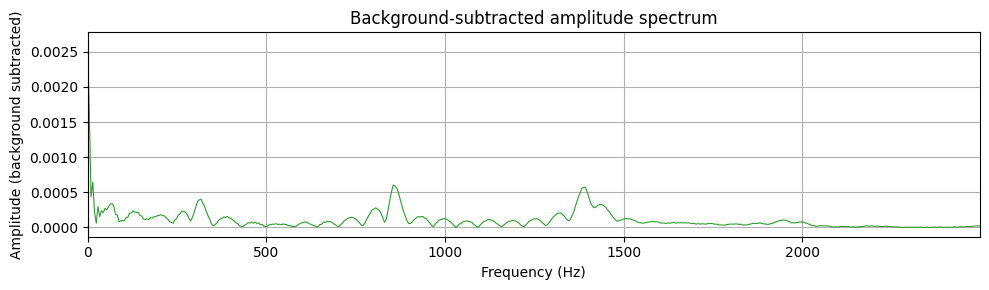

In [31]:
def read_time_voltage(path):
    try:
        df_local = pd.read_csv(path, header=19, encoding='utf-8')
    except UnicodeDecodeError:
        df_local = None
        for enc in ('latin1', 'cp1252'):
            try:
                df_local = pd.read_csv(path, header=19, encoding=enc)
                break
            except Exception:
                df_local = None
        if df_local is None:
            raise RuntimeError(f"Failed to read {path} with utf-8, latin1, or cp1252 encodings")
    cols = [c.strip() for c in df_local.columns]
    df_local.columns = cols
    if set(cols) >= {'x', 'y'}:
        df_local = df_local.rename(columns={'x': 'time', 'y': 'voltage'})
    elif set(cols) >= {'time', 'voltage'}:
        pass
    else:
        df_local = df_local.iloc[:, :2]
        df_local.columns = ['time', 'voltage']
    return df_local['time'].to_numpy(), df_local['voltage'].to_numpy()

sig_time, sig_volt = read_time_voltage('small.csv')
bg_time, bg_volt   = read_time_voltage('smallbackground.csv')

# sampling intervals
dt_sig = np.mean(np.diff(sig_time))
dt_bg  = np.mean(np.diff(bg_time))

if abs(dt_sig - dt_bg) > 1e-9:
    bg_volt_resampled = np.interp(sig_time, bg_time, bg_volt)
    sig_time_common = sig_time
    volt_sig_common = sig_volt
    volt_bg_common  = bg_volt_resampled
    dt_common = dt_sig
    N_common = len(sig_time)
else:
    dt_common = dt_sig
    N_common = max(len(sig_volt), len(bg_volt))
    volt_sig_common = np.pad(sig_volt, (0, N_common - len(sig_volt)), mode='constant')
    volt_bg_common  = np.pad(bg_volt,  (0, N_common - len(bg_volt)),  mode='constant')
    sig_time_common = np.arange(N_common) * dt_common

yf_sig = np.fft.rfft(volt_sig_common, n=N_common)
yf_bg  = np.fft.rfft(volt_bg_common,  n=N_common)
xf = np.fft.rfftfreq(N_common, d=dt_common)

amp_sig = np.abs(yf_sig) / N_common
amp_bg  = np.abs(yf_bg)  / N_common

amp_sub = amp_sig - amp_bg
amp_sub = np.clip(amp_sub, 0.0, None)

plt.figure(figsize=(10, 3))
plt.plot(xf, amp_sig, label='signal (small.csv)', linewidth=0.7)
plt.plot(xf, amp_bg,  label='background (smallbackground.csv)', linewidth=0.7, alpha=0.8)
plt.xlim(0, min(2500, np.max(xf)))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Amplitude spectra - signal and background')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,3))
plt.plot(xf, amp_sub, color='C2', linewidth=0.8)
plt.xlim(0, min(2500, np.max(xf)))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (background subtracted)')
plt.title('Background-subtracted amplitude spectrum')
plt.grid(True)
plt.tight_layout()
plt.show()



In [24]:
Vol =946e-6 #946 mL = 946e-6 m^3

def areacyl(r,h):
    return np.pi*(r**2)
#1.25 inch height
#3 cm accross interior
#3.5 cm exterior
A= areacyl(0.015,0.03175)
v = 343 #m/s
l=0.03175
fres= (v/(2*np.pi))*(np.sqrt(A/(Vol*l)))
fres
fcorrected= (v/(2*np.pi))*(np.sqrt(A/(Vol*(l+(0.85*0.015)))))
fres,fcorrected



(np.float64(264.8274593343968), np.float64(223.69427708149144))

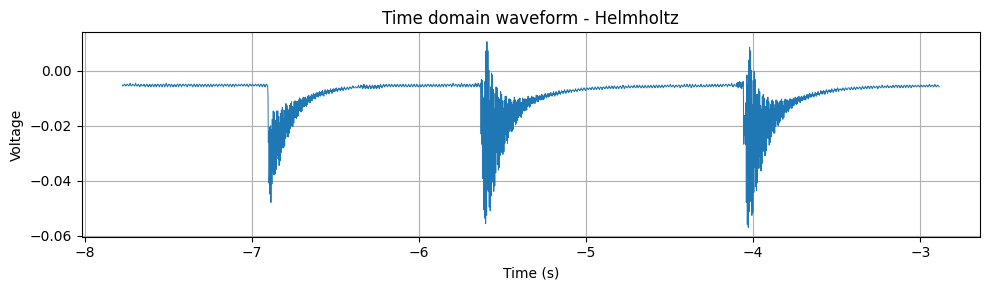

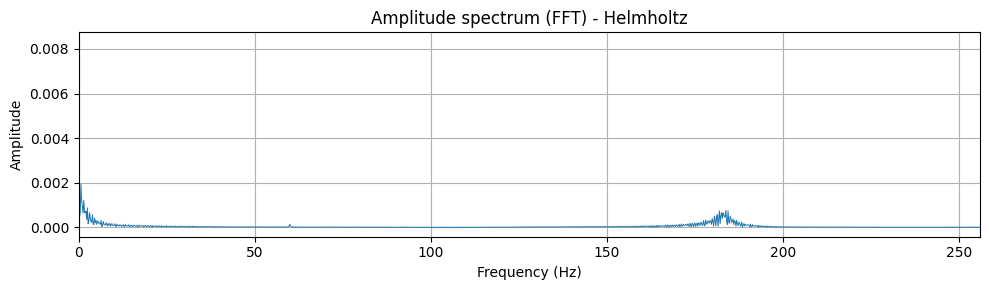

In [25]:
filepath = 'helmoltz.csv'
try:
    df = pd.read_csv(filepath, header=19, encoding='utf-8')
except UnicodeDecodeError:
    # fallback to single-byte encodings if file isn't UTF-8
    for enc in ('latin1', 'cp1252'):
        try:
            df = pd.read_csv(filepath, header=19, encoding=enc)
            break
        except Exception:
            df = None
    if df is None:
        raise RuntimeError(f"Failed to read {filepath} with utf-8, latin1, or cp1252 encodings")

# Normalize/ensure column names are time,voltage
cols = [c.strip() for c in df.columns]
df.columns = cols
if set(cols) >= {'x', 'y'}:
    df = df.rename(columns={'x': 'time', 'y': 'voltage'})
elif set(cols) >= {'time', 'voltage'}:
    pass
else:
    df = df.iloc[:, :2]
    df.columns = ['time', 'voltage']

time = df['time'].to_numpy()
voltage = df['voltage'].to_numpy()

# Plot time-domain signal
plt.figure(figsize=(10, 3))
plt.plot(time, voltage, linewidth=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Voltage')
plt.title('Time domain waveform - Helmholtz')
plt.grid(True)
plt.tight_layout()
plt.show()

# Compute FFT
dt = np.mean(np.diff(time))
fs = 1.0 / dt
N = len(voltage)
yf = np.fft.rfft(voltage)
xf = np.fft.rfftfreq(N, d=dt)
amp = np.abs(yf) / N

# Plot amplitude spectrum
plt.figure(figsize=(10, 3))
plt.plot(xf, amp, linewidth=0.7)
plt.xlim(0, fs/2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Amplitude spectrum (FFT) - Helmholtz')
plt.grid(True)
plt.tight_layout()
plt.show()